In [104]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [105]:
df = pd.read_csv('cleaned.csv')

In [106]:
df.head()

,Unnamed: 0,Name,Cuisines,City,Rating,NumberOfReviews
0,0,Wakame,"Japanese, Asian",Riyadh,4.9,20
1,1,Morini Italian Restaurant,"International, Italian",Riyadh,4.5,18
2,2,Wakame,"Chinese, Japanese",Jeddah,4.8,63
3,3,Il Baretto Italian Restaurant,Italian,Riyadh,4.5,30
4,4,Vidro Lounge,"Mediterranean, Middle Eastern",Riyadh,4.7,31


In [107]:
df.City.unique()

array(['                    Riyadh                    ',
       '                    Jeddah                    ',
       '                    Al Khobar                    ',
       '                    AlUla                    ',
       '                    Makkah                    ',
       '                    Madinah                    ',
       '                    Dammam                    ',
       '                    The Riyadh Province                    ',
       '                    Jazan                    ',
       '                    Taif                    ',
       '                    Rabigh                    ',
       '                    Dhahran                    '], dtype=object)

In [108]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [109]:
df.City.value_counts()

City
Jeddah                                     461
Riyadh                                     369
Makkah                                     240
Al Khobar                                  108
Madinah                                     84
AlUla                                       36
Dammam                                      35
Taif                                        15
Jazan                                       14
Dhahran                                      5
The Riyadh Province                          1
Rabigh                                       1
Name: count, dtype: int64

In [110]:
df.dtypes

Name                object
Cuisines            object
City                object
Rating             float64
NumberOfReviews      int64
dtype: object

In [111]:
df_encoded = df.drop(['Name', 'Cuisines', 'City'], axis = 1)

In [112]:
df_encoded.head()

,Rating,NumberOfReviews
0,4.9,20
1,4.5,18
2,4.8,63
3,4.5,30
4,4.7,31


In [113]:
from sklearn.preprocessing import LabelEncoder

In [65]:
encoder = LabelEncoder()
df_encoded['City'] = encoder.fit_transform(df_encoded['City'])

In [66]:
df_encoded.head()

,City,Rating,NumberOfReviews
0,9,4.9,20
1,9,4.5,18
2,5,4.8,63
3,9,4.5,30
4,9,4.7,31


In [67]:
df_encoded.dtypes

City                 int32
Rating             float64
NumberOfReviews      int64
dtype: object

In [114]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[['Rating', 'NumberOfReviews']])

In [69]:
# Rating, Number of reviews 

In [70]:
city_reshaped = df_encoded['City'].values.reshape(-1, 1)

In [71]:
city_reshaped

array([[9],
       [9],
       [5],
       ...,
       [9],
       [7],
       [5]])

In [72]:
df_scaled = np.hstack((df_scaled, city_reshaped))

In [115]:
df_scaled

array([[ 1.61099021, -0.54257666],
       [ 0.61395332, -0.69103023],
       [ 1.36173099,  2.64917512],
       ...,
       [-1.8786389 , -0.09721594],
       [-2.62641657,  1.2388662 ],
       [-1.8786389 ,  0.27391798]])

In [116]:
kmeans = KMeans(n_clusters = 3, random_state = 777)
kmeans_labels = kmeans.fit_predict(df_scaled)


c:\Users\Faisal\Anaconda3\envs\Tuwaiq\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [117]:
kmeans_labels

array([1, 1, 0, ..., 2, 2, 2])

In [85]:
df['City'] = df.City.str.strip()

In [118]:
df['cluster'] = kmeans_labels

In [119]:
wcss = []
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\Faisal\Anaconda3\envs\Tuwaiq\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Faisal\Anaconda3\envs\Tuwaiq\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Faisal\Anaconda3\envs\Tuwaiq\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Faisal\Anaconda3\envs\Tuwaiq\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

In [21]:
import matplotlib.pyplot as plt

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 777)
kmeans_labels = kmeans.fit_predict(df_scaled)


c:\Users\Faisal\Anaconda3\envs\Tuwaiq\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [67]:
import joblib
joblib.dump(kmeans, 'kmeans.joblib')

['kmeans.joblib']

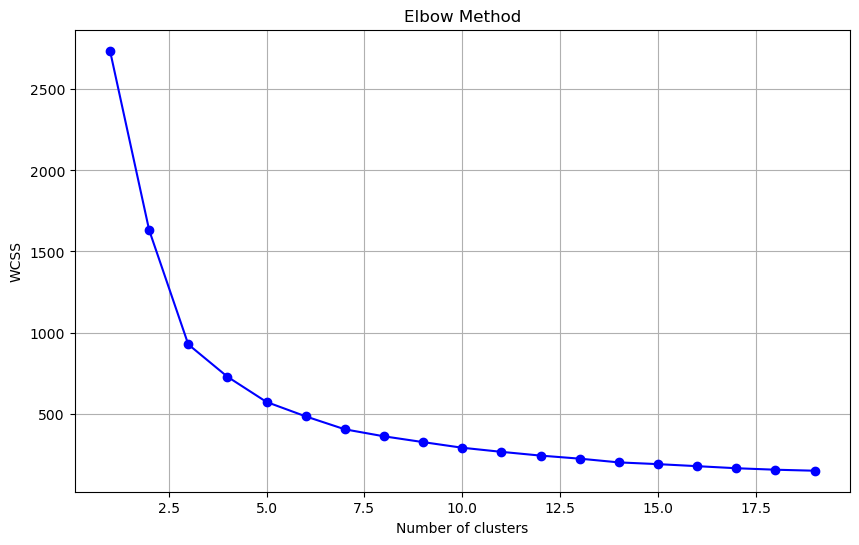

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [24]:
from sklearn.cluster import DBSCAN 

In [121]:
dbscan = DBSCAN(eps = 1, min_samples = 4)
dbscan_labels = dbscan.fit_predict(df_scaled)
len(np.unique(dbscan_labels))

2

In [122]:
X_scaled = df_scaled

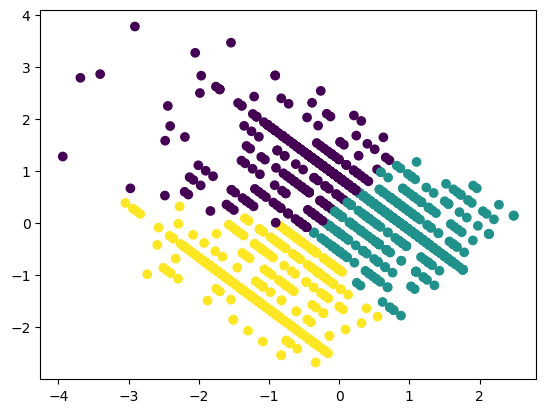

In [123]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)
df_encoded['Kmeans'] = kmeans_labels 
df_pca = pca.fit_transform(df_scaled)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = kmeans_labels, cmap= 'viridis')

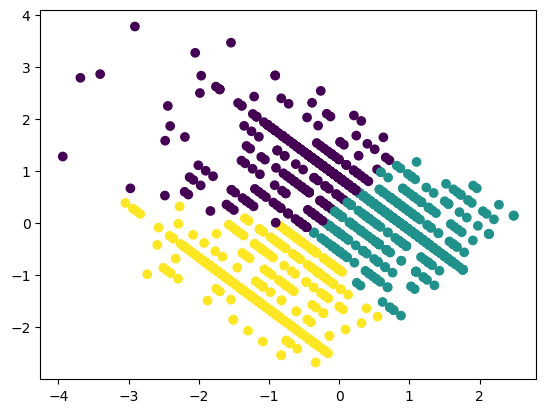

In [124]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = kmeans_labels, cmap= 'viridis')

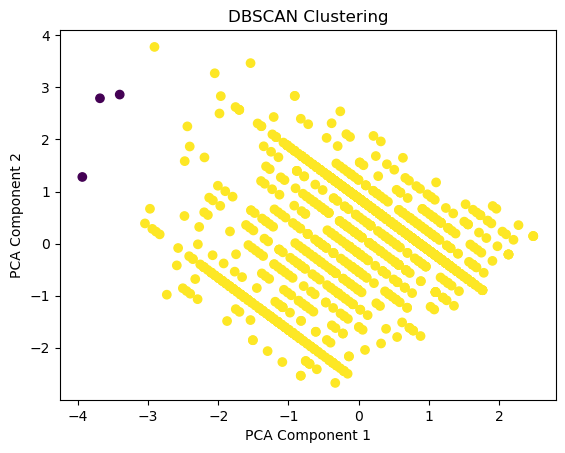

In [125]:
df['DBSCAN_Cluster'] = dbscan_labels
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [32]:
# import joblib 
# joblib.dump(kmeans, 'kmeans.joblib')
# joblib.dump(encoder,'label_encoder.joblib')
# joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

<bound method BaseEstimator.get_params of LabelEncoder()>

In [35]:
# cities = ['Riyadh', 'Jeddah', 'Al Khobar', 'AlUla', 'Makkah', 'Madinah', 
#           'Dammam', 'The Riyadh Province', 'Jazan', 'Taif', 'Rabigh', 'Dhahran']

# # Initialize LabelEncoder

# # Fit the label encoder on the list of cities
# encoder.fit(cities)

# # Get the mapping
# classes = encoder.classes_

# # Display the mapping
# mapping = {city: index for index, city in enumerate(classes)}
# print(mapping)

{'Al Khobar': 0, 'AlUla': 1, 'Dammam': 2, 'Dhahran': 3, 'Jazan': 4, 'Jeddah': 5, 'Madinah': 6, 'Makkah': 7, 'Rabigh': 8, 'Riyadh': 9, 'Taif': 10, 'The Riyadh Province': 11}
